<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Unsupervised Learning - DBSCAN - Network-Intrusion-Detektor
</b></font> </br></p>

---


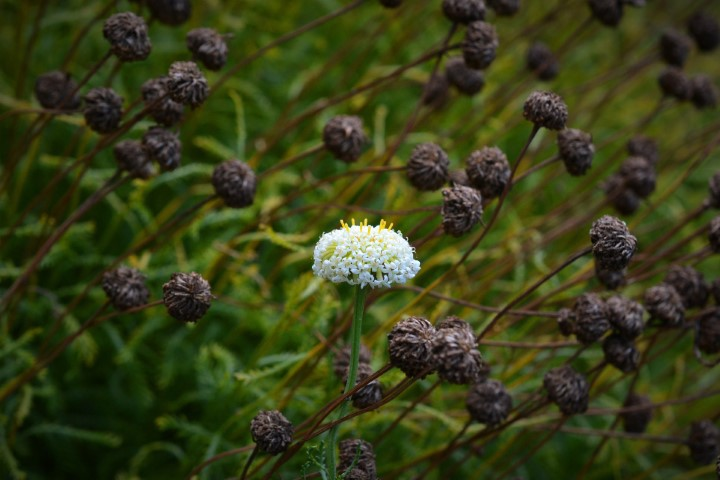

Bild von <a href="https://pixabay.com/de/users/anemone123-2637160/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1576948">Anemone123</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1576948">Pixabay</a>

# **1  <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

Dies ist der Datensatz, der für den Third International Knowledge Discovery and Data Mining Tools Competition verwendet wurde. Die Wettbewerbsaufgabe bestand darin, einen Netzwerk-Intrusion-Detektor zu bauen, ein Vorhersagemodell, das in der Lage ist, zwischen schlechten Verbindungen, sogenannten Intrusionen oder Angriffen, und guten normalen Verbindungen zu unterscheiden. Diese Datenbank enthält einen zu prüfenden Standarddatensatz, der eine Vielzahl von Eindringversuchen umfasst, die in einer militärischen Netzwerkumgebung simuliert wurden.

Der ursprüngliche KDD Cup 1999-Datensatz aus dem  UCI-Repositorium für maschinelles Lernen  enthält 41 Attribute (34 kontinuierlich und 7 kategorial), sie werden jedoch auf 3 Attribute (Dauer, src_bytes, dst_bytes) reduziert.

Da die kontinuierlichen Attributwerte um '0' herum konzentriert sind, haben wir jeden Wert durch y = log(x + 0,1) in einen Wert weit von '0' transformiert.

Aus KDD Cup 1999-Datensatz werden ca. 500k „http“-Dienstdaten verwendet.

Der KDD Cup ist der jährliche Data-Mining- und Knowledge-Discovery-Wettbewerb, der von der ACM Special Interest Group on Knowledge Discovery and Data Mining, der führenden Berufsorganisation von Data-Minern, organisiert wird.


[DataSet](https://www.openml.org/search?type=data&status=active&id=1113)

[Info](http://odds.cs.stonybrook.edu/http-kddcup99-dataset/)


[UCI](https://archive.ics.uci.edu/ml/datasets/kdd+cup+1999+data)

[KDD](https://kdd.org/kdd-cup)



**Datensatz:**

| feature name  | description                                      | type        |
|------------|--------------------------------------------------|-------------|
| duration   | length (number of seconds) of the connection     | continuous  |
| src_bytes  | number of data bytes from source to destination  | continuous  |
| dst_bytes  | number of data bytes from destination to source  | continuous  |

<br>
<br>


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# filename = '/content/drive/MyDrive/ml-kurs/02 data/kddcup1999_xs.csv'
# import pandas as pd
# df = pd.read_csv(filename, header=0, usecols=['duration', 'src_bytes', 'dst_bytes', 'Intrusion'])

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ralf-42/ml-kurs/main/02%20data/kddcup1999_xs.csv')

In [ ]:
label = 'Intrusion'
features = [n for n in df.columns if n != label]

target = df[label].copy()
data = df[features].copy()

In [ ]:
target.value_counts()

# **2 <font color='orange'>|</font> Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Train-Test-Split erstellen</br>
✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>

 <p><font color='black' size="5">
Train-Test-Split (nur zur Reduktion des Datenvolumens)
</font></p>

Erfolgt nur, um das Datenvolumen zu reduzieren. Bei 100k Datensätze erfolgt Abbruch mit Hinweis auf Bezahlversion. 😉

In [ ]:
from sklearn.model_selection import train_test_split
data, _, target, _ = train_test_split(data, target, train_size=0.5, random_state=42, stratify=target)
data.shape, target.shape

In [ ]:
target.value_counts()

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.6, min_samples=30)
model.fit(data)

In [ ]:
pd.DataFrame(model.labels_).value_counts()

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>

<p><font color='black' size="5">
Silhouette Koeffizient
</font></p>

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_coef = silhouette_score(data, model.labels_)
print("Silhouette-Koeffizient:", silhouette_coef)

<p><font color='black' size="5">
Umcodierung Ergebnisse DBSCAN
</font></p>

In [ ]:
target_pred = pd.DataFrame(model.labels_).copy()
target_pred.columns = ["Intrusion"]
target_pred.replace([-1, 0, 1, 2], [0, 0, 0, 1], inplace = True)

In [ ]:
target_pred.value_counts()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(target, target_pred)


<p><font color='black' size="5">
Confusion Matrix
</font></p>

In [ ]:
import matplotlib as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(target, target_pred)
plt.rcParams['figure.figsize'] = [5, 5]
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No','Yes'])
disp.plot(cmap='Blues')

In [ ]:
print(classification_report(target, target_pred, target_names=['No','Yes']))

<p><font color='black' size="5">
Aufbau Analysewürfel
</font></p>

In [ ]:
# Übernahme der Testdaten
cube = data.copy()
cube.reset_index(inplace=True)

# Übernahem Target real & predict
cube['real'] = pd.DataFrame(target.values)
cube['predict'] = target_pred

# Erstellung 2D Features über Dimensionsreduktion PCA - unsupervised
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(data)
pca_df = pd.DataFrame(pca)

# Cube um pca erweitern
cube['PCA1'] = pca_df[0]
cube['PCA2'] = pca_df[1]

<p><font color='black' size="5">
Visualisierung real vs predict
</font></p>

In [ ]:
import plotly.express as px
import plotly.subplots as sp

In [ ]:
# Histogramm
title_ = 'Histogramm real vs predict'
fig = px.histogram(cube, x=['real', 'predict'], nbins=2, text_auto=".2s", title=title_)
fig.update_layout(barmode='group',bargap=0.1, width=600, height=600)
fig.show()

In [ ]:
# 2 x Scatterplots

cube['real_cat'] = cube['real'].astype(str)
cube['predict_cat'] = cube['predict'].astype(str)

title_ = 'Streupunktdiagramm real'
img1 = px.scatter(cube, x='PCA1', y='PCA2', color='real_cat', width=600, height=600)

title_ = 'Streupunktdiagramm predict'
img2 = px.scatter(cube, x='PCA1', y='PCA2', color='predict_cat', width=600, height=600)

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Scatterplot real', 'Scatterplot predict'))

for trace in img1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in img2.data:
    fig.add_trace(trace, row=1, col=2)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text=title_)

# Plot anzeigen
fig.show()

In [ ]:
# real <> predict
cube[cube.real != cube.predict].describe().T

In [ ]:
cube[cube.real != cube.predict]

# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>